Do the following in the wine dataset.
1. Read the dataset to the python environment.
2. Try out different clustering models in the wine dataset.
3. Find the optimum number of clusters in each model and create the model with
the optimum number of clusters.


Information about dataset

- Malic_Acid = Malic Acid is one of the main acids found in the acidity of grapes. Its concentration decreases the more a grape ripens. Malic Acid provides a strong link to wines tasting ‘flat’ if there is not enough. If there is too much the wine will taste ‘sour’. It is vital that the levels of malic acid are monitored during the fermentation process.

- Ash = Ash determination is an obligatory analysis for certified wines to be placed on the market. It is defined as all the inorganic matter remaining after igniting the residue left from the evaporation of must or wine

- Ash_Alcanity = The alkalinity of the ash is defined as the sum of cations, other than the ammonium ion, combined with the organic acids in the wine

- Magnesium = Magnesium cations are present in wine as a result of soil nutrient uptake in the vineyard.

- Total_Phenols = The phenolic content in wine refers to the phenolic compounds—natural phenol and polyphenols—in wine, which include a large group of several hundred chemical compounds that affect the taste, color and mouthfeel of wine.

- Flavonoids = Flavonoids are the main polyphenols present in red wine by weight, and constitute about 80 to 90% of total polyphenols

- Nonflavanoid_Phenols = Non-flavonoid phenolics include several subclasses of importance to wine, in particular the hydroxycinnamates, stilbenes, and benzoic acids.

- Proanthocyanins = Proanthocyanidins are the principal polyphenols in red wine that are under research to assess risk of coronary heart disease and lower overall mortality. With tannins, they also influence the aroma, flavor, mouth-feel and astringency of red wines.

- Color_Intensity = A simple measure of how dark the wine is using a summation of absorbance measurements in the violet, green and red areas of the visible spectrum

- Proline = Proline is typically the most abundant amino acid present in grape juice and wine.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import linkage,dendrogram,cut_tree

Read data into python

In [2]:
wine=pd.read_csv(r"D:\DSA - ICT\Week 14\Case study\Wine.csv")

Check the dataset and get basic information

In [3]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


There are only numerical variables in the dataset - no categorical variables are there 

Basic statistical summary of the dataset

In [4]:
wine.describe().T.style.background_gradient(cmap="Reds")

,count,mean,std,min,25%,50%,75%,max
Alcohol,178.000000,13.000618,0.811827,11.030000,12.362500,13.050000,13.677500,14.830000
Malic_Acid,178.000000,2.336348,1.117146,0.740000,1.602500,1.865000,3.082500,5.800000
Ash,178.000000,2.366517,0.274344,1.360000,2.210000,2.360000,2.557500,3.230000
Ash_Alcanity,178.000000,19.494944,3.339564,10.600000,17.200000,19.500000,21.500000,30.000000
Magnesium,178.000000,99.741573,14.282484,70.000000,88.000000,98.000000,107.000000,162.000000
Total_Phenols,178.000000,2.295112,0.625851,0.980000,1.742500,2.355000,2.800000,3.880000
Flavanoids,178.000000,2.029270,0.998859,0.340000,1.205000,2.135000,2.875000,5.080000
Nonflavanoid_Phenols,178.000000,0.361854,0.124453,0.130000,0.270000,0.340000,0.437500,0.660000
Proanthocyanins,178.000000,1.590899,0.572359,0.410000,1.250000,1.555000,1.950000,3.580000
Color_Intensity,178.000000,5.058090,2.318286,1.280000,3.220000,4.690000,6.200000,13.000000


Dimension of the dataset

In [5]:
wine.shape

(178, 13)

Checking for the null values

In [6]:
wine.isnull().sum().to_frame().style.bar(color="red")

,0
Alcohol,0
Malic_Acid,0
Ash,0
Ash_Alcanity,0
Magnesium,0
Total_Phenols,0
Flavanoids,0
Nonflavanoid_Phenols,0
Proanthocyanins,0
Color_Intensity,0


Checking for the skewness

In [7]:
wine.skew().sort_values(ascending=False).to_frame().style.bar(color="red")

,0
Magnesium,1.098191
Malic_Acid,1.039651
Color_Intensity,0.868585
Proline,0.767822
Proanthocyanins,0.517137
Nonflavanoid_Phenols,0.450151
Ash_Alcanity,0.213047
Total_Phenols,0.086639
Flavanoids,0.025344
Hue,0.021091


Alcohol , Ash and OD280 are slightly left skewed , others are right skewed

Chances of outlier presence in these due to skewness

Data Visualisation

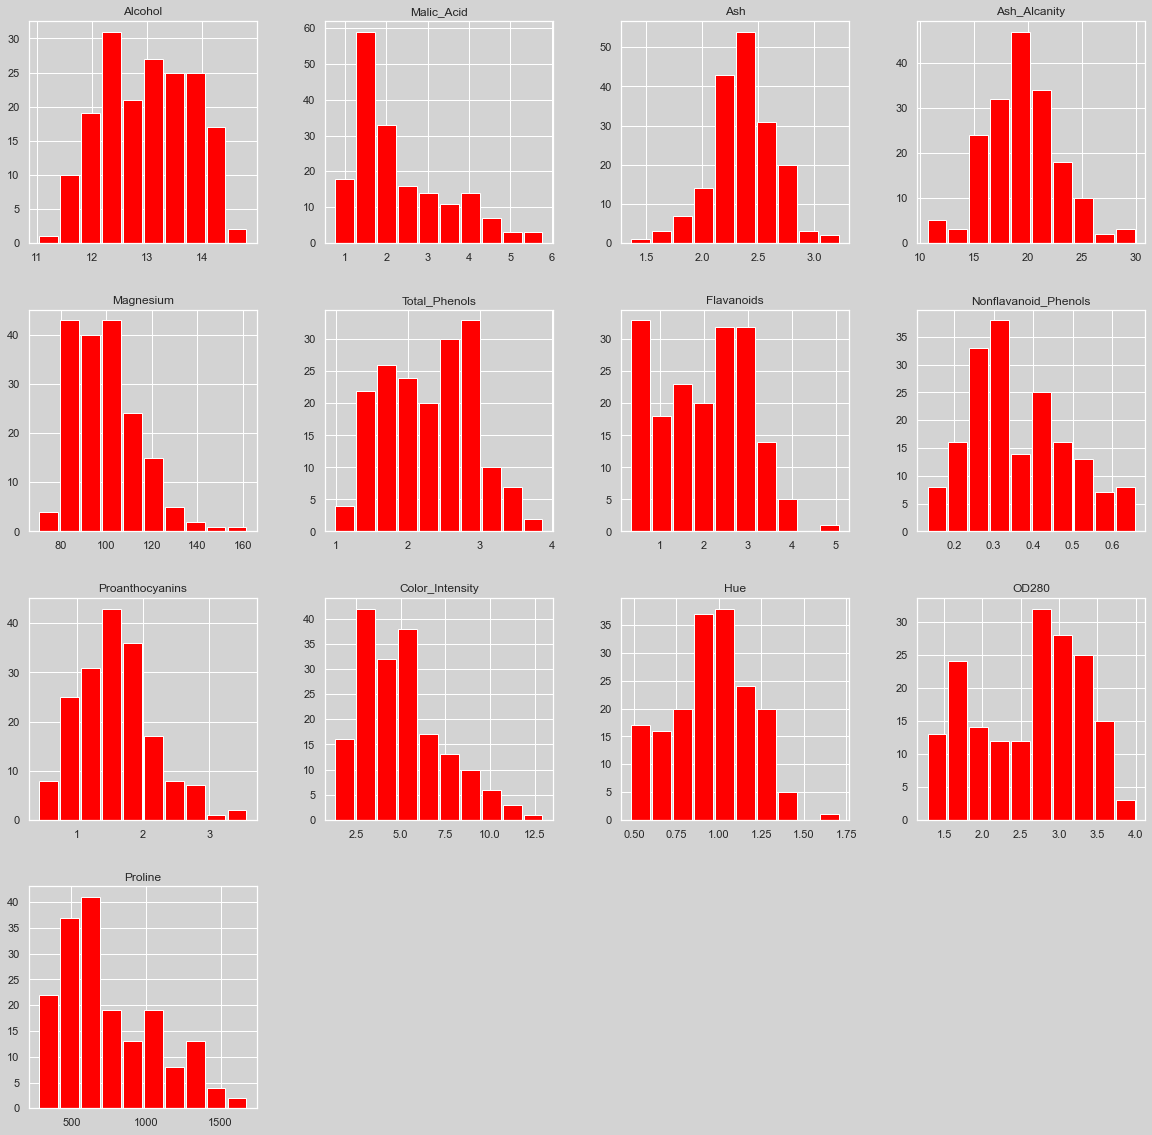

In [8]:
sns.set(rc={'axes.facecolor':'lightgrey', 'figure.facecolor':'lightgrey'})
wine.hist(figsize=(20,20),rwidth=0.9,color="red")
plt.show()

Checking for the outliers

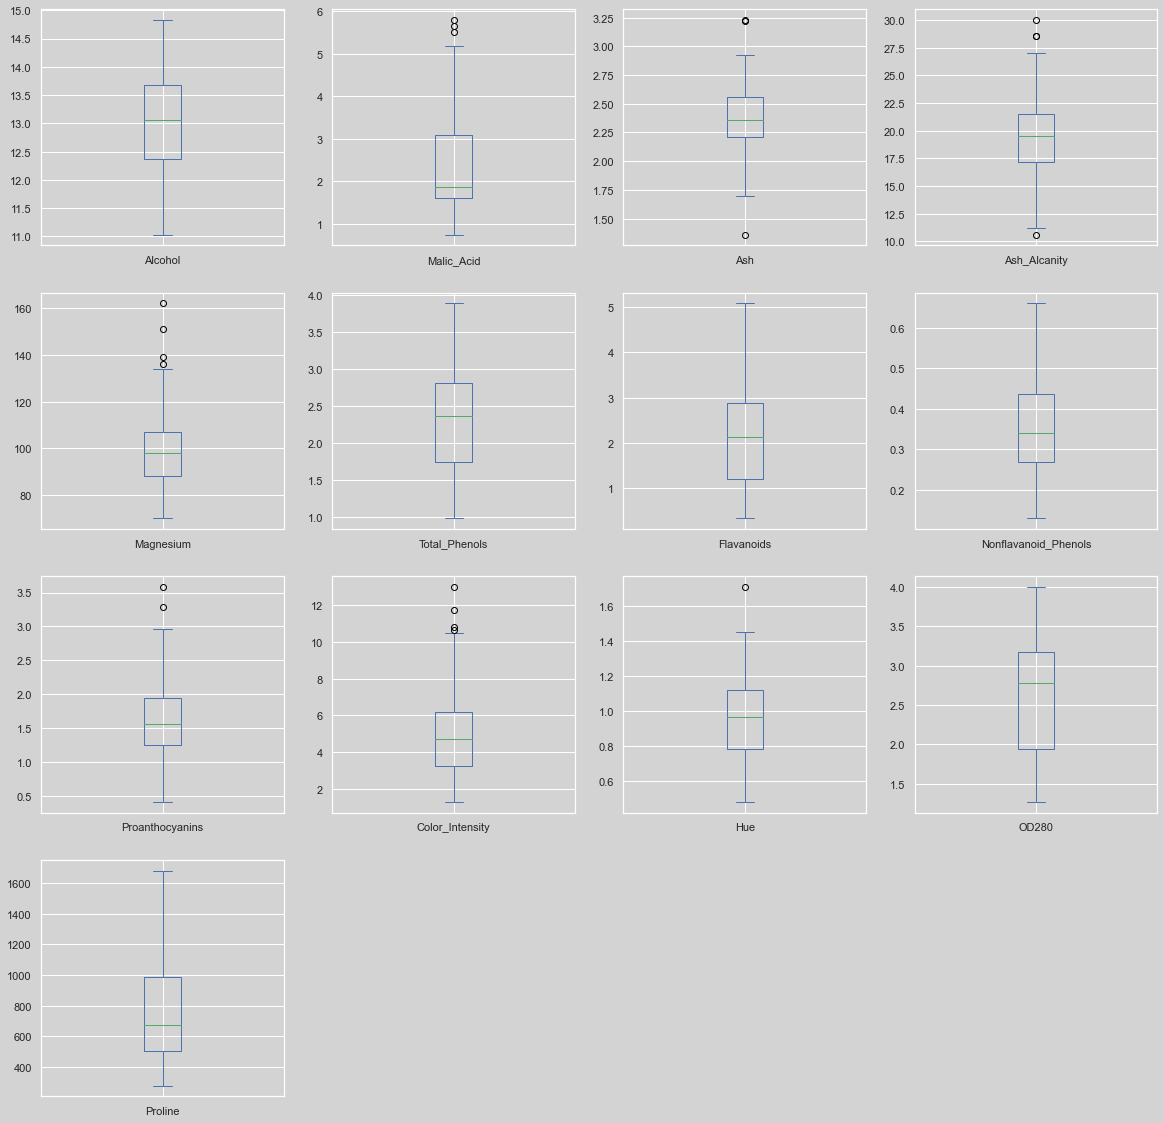

In [9]:
wine.plot(kind="box",subplots=True,layout=(4,4),figsize=(20,20))
plt.show()

There are some outliers , but not handling the outliers now since PCA is to be applied 

We will handle outliers after the PCA is done 

Checking the correlation of the variables

<AxesSubplot:>

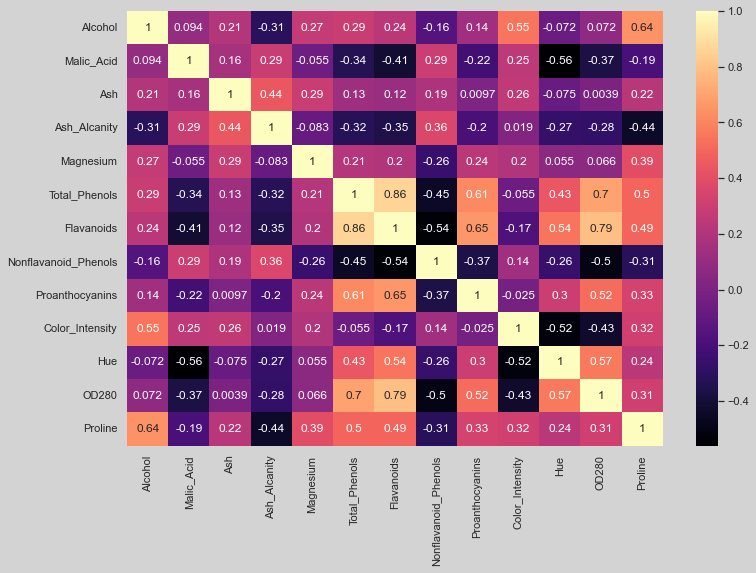

In [10]:
plt.figure(figsize= (12,8))
sns.heatmap(wine.corr(), annot = True, cmap = "magma")

Total phenols and flavanoids are highly correlated with correlation of 0.86 

OD280 and Flavanoids are highly correlated with correlation of 0.79 

OD280 and phenols have correlation of 0.7

Proanthocyanins have good correlation with total phenols and Flavanoids with 0.61 and 0.65 respectively

Alcohols and proline have correlation of 0.64 

There are also some other variables with have correlation above 0.5 

So there is a good correlation among variables - PCA can be applied

Scaling to be done to apply the PCA and clustering alogorithm

Standard scaler to be applied

In [11]:
scaler = StandardScaler()
wine_scaled = scaler.fit_transform(wine)
wine_scaled = pd.DataFrame(wine_scaled, columns=wine.columns)
wine_scaled.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


In [12]:
wine_scaled.describe().T.style.background_gradient(cmap="inferno")

,count,mean,std,min,25%,50%,75%,max
Alcohol,178.000000,-0.000000,1.002821,-2.434235,-0.788245,0.061000,0.836129,2.259772
Malic_Acid,178.000000,-0.000000,1.002821,-1.432983,-0.658749,-0.423112,0.669793,3.109192
Ash,178.000000,-0.000000,1.002821,-3.679162,-0.572122,-0.023821,0.698109,3.156325
Ash_Alcanity,178.000000,-0.000000,1.002821,-2.671018,-0.689137,0.001518,0.602088,3.154511
Magnesium,178.000000,-0.000000,1.002821,-2.088255,-0.824415,-0.122282,0.509638,4.371372
Total_Phenols,178.000000,-0.000000,1.002821,-2.107246,-0.885468,0.095960,0.808997,2.539515
Flavanoids,178.000000,-0.000000,1.002821,-1.695971,-0.827539,0.106150,0.849085,3.062832
Nonflavanoid_Phenols,178.000000,0.000000,1.002821,-1.868234,-0.740141,-0.176095,0.609541,2.402403
Proanthocyanins,178.000000,-0.000000,1.002821,-2.069034,-0.597284,-0.062898,0.629175,3.485073
Color_Intensity,178.000000,-0.000000,1.002821,-1.634288,-0.795103,-0.159225,0.493956,3.435432


After applying the scaling , we can see the difference in the statistics

PCA application

In [13]:
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized',random_state=42)
pca.fit(wine_scaled)

PCA(random_state=42, svd_solver='randomized')

In [14]:
pca.components_

array([[ 0.1443294 , -0.24518758, -0.00205106, -0.23932041,  0.14199204,
         0.39466085,  0.4229343 , -0.2985331 ,  0.31342949, -0.0886167 ,
         0.29671456,  0.37616741,  0.28675223],
       [-0.48365155, -0.22493093, -0.31606881,  0.0105905 , -0.299634  ,
        -0.06503951,  0.00335981, -0.02877949, -0.03930172, -0.52999567,
         0.27923515,  0.16449619, -0.36490283],
       [-0.20738262,  0.08901289,  0.6262239 ,  0.61208035,  0.13075693,
         0.14617896,  0.1506819 ,  0.17036816,  0.14945431, -0.13730621,
         0.08522192,  0.16600459, -0.12674592],
       [-0.0178563 ,  0.53689028, -0.21417556,  0.06085941, -0.35179658,
         0.19806835,  0.15229479, -0.20330102,  0.39905653,  0.06592568,
        -0.42777141,  0.18412074, -0.23207086],
       [-0.26566365,  0.03521363, -0.14302547,  0.06610294,  0.72704851,
        -0.14931841, -0.10902584, -0.50070298,  0.13685982, -0.07643678,
        -0.17361452, -0.10116099, -0.1578688 ],
       [-0.21353865, -0.536813

In [15]:
pca.explained_variance_ratio_

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

In [16]:
colnames = list(wine_scaled.columns)
pca_wine = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'PC3':pca.components_[2],
                       'PC4':pca.components_[3], 'PC5':pca.components_[4],'PC6':pca.components_[5],
                       'PC7':pca.components_[6], 'PC8':pca.components_[7],'PC9':pca.components_[8],'PC10':pca.components_[9],
                       'PC11':pca.components_[10],'PC12':pca.components_[11],'PC13':pca.components_[12],
                       'Feature':colnames})
pca_wine.style.background_gradient(cmap="plasma")

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,Feature
0,0.144329,-0.483652,-0.207383,-0.017856,-0.265664,-0.213539,-0.056396,-0.396139,0.508619,0.211605,-0.225917,-0.266286,0.014970,Alcohol
1,-0.245188,-0.224931,0.089013,0.536890,0.035214,-0.536814,0.420524,-0.065827,-0.075283,-0.309080,0.076486,0.121696,0.025964,Malic_Acid
2,-0.002051,-0.316069,0.626224,-0.214176,-0.143025,-0.154475,-0.149171,0.170260,-0.307694,-0.027125,-0.498691,-0.049622,-0.141218,Ash
3,-0.239320,0.010591,0.612080,0.060859,0.066103,0.100825,-0.286969,-0.427970,0.200449,0.052799,0.479314,-0.055743,0.091683,Ash_Alcanity
4,0.141992,-0.299634,0.130757,-0.351797,0.727049,-0.038144,0.322883,0.156361,0.271403,0.067870,0.071289,0.062220,0.056774,Magnesium
5,0.394661,-0.065040,0.146179,0.198068,-0.149318,0.084122,-0.027925,0.405934,0.286035,-0.320131,0.304341,-0.303882,-0.463908,Total_Phenols
6,0.422934,0.003360,0.150682,0.152295,-0.109026,0.018920,-0.060685,0.187245,0.049578,-0.163151,-0.025694,-0.042899,0.832257,Flavanoids
7,-0.298533,-0.028779,0.170368,-0.203301,-0.500703,0.258594,0.595447,0.233285,0.195501,0.215535,0.116896,0.042352,0.114040,Nonflavanoid_Phenols
8,0.313429,-0.039302,0.149454,0.399057,0.136860,0.533795,0.372139,-0.368227,-0.209145,0.134184,-0.237363,-0.095553,-0.116917,Proanthocyanins
9,-0.088617,-0.529996,-0.137306,0.065926,-0.076437,0.418644,-0.227712,0.033797,0.056218,-0.290775,0.031839,0.604222,-0.011993,Color_Intensity


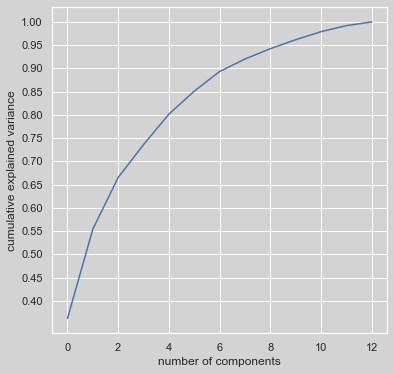

In [17]:
#plotting the cumulative variance against the number of components
fig = plt.figure(figsize = (6,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.yticks(np.arange(0.4,1.05,0.05))
plt.show()

In [18]:
colnames = list(wine_scaled.columns)
pca_wine = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'PC3':pca.components_[2],
                       'PC4':pca.components_[3],'PC5':pca.components_[4],'PC6':pca.components_[5], 
                       'Feature':colnames})
pca_wine.style.background_gradient(cmap="viridis")

,PC1,PC2,PC3,PC4,PC5,PC6,Feature
0,0.144329,-0.483652,-0.207383,-0.017856,-0.265664,-0.213539,Alcohol
1,-0.245188,-0.224931,0.089013,0.536890,0.035214,-0.536814,Malic_Acid
2,-0.002051,-0.316069,0.626224,-0.214176,-0.143025,-0.154475,Ash
3,-0.239320,0.010591,0.612080,0.060859,0.066103,0.100825,Ash_Alcanity
4,0.141992,-0.299634,0.130757,-0.351797,0.727049,-0.038144,Magnesium
5,0.394661,-0.065040,0.146179,0.198068,-0.149318,0.084122,Total_Phenols
6,0.422934,0.003360,0.150682,0.152295,-0.109026,0.018920,Flavanoids
7,-0.298533,-0.028779,0.170368,-0.203301,-0.500703,0.258594,Nonflavanoid_Phenols
8,0.313429,-0.039302,0.149454,0.399057,0.136860,0.533795,Proanthocyanins
9,-0.088617,-0.529996,-0.137306,0.065926,-0.076437,0.418644,Color_Intensity


In [19]:
# we are using the incrementalPCA for better efficiency
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=6)


In [20]:
wine_final = pca_final.fit_transform(wine_scaled)
wine_final.shape

(178, 6)

In [21]:
wine_final = pd.DataFrame(wine_final, columns=["PC1", "PC2","PC3","PC4","PC5","PC6"])
wine_final.head()

,PC1,PC2,PC3,PC4,PC5,PC6
0,3.329763,1.403881,-0.168232,-0.043424,0.760087,0.121159
1,2.187731,-0.349782,-2.037662,-0.269176,-0.104057,-0.847644
2,2.549298,0.964828,0.990651,0.616498,-0.481764,0.743088
3,3.816423,2.670785,-0.194308,0.511016,-0.338059,-0.194495
4,1.008417,0.890312,2.014713,-0.316643,0.386236,-0.116065


<AxesSubplot:>

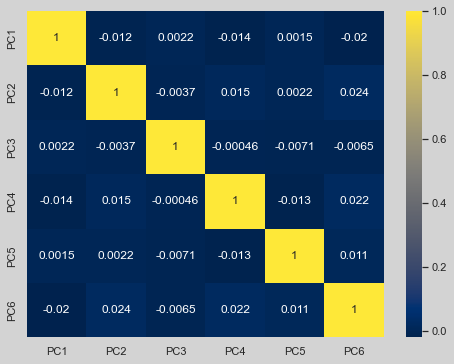

In [22]:
plt.figure(figsize = (8,6))        
sns.heatmap(wine_final.corr(),annot = True,cmap="cividis")

In [23]:
#After doing the PCA , when we check the correlation we can see that the correlation between variables is very less/negligible

Outlier handling 

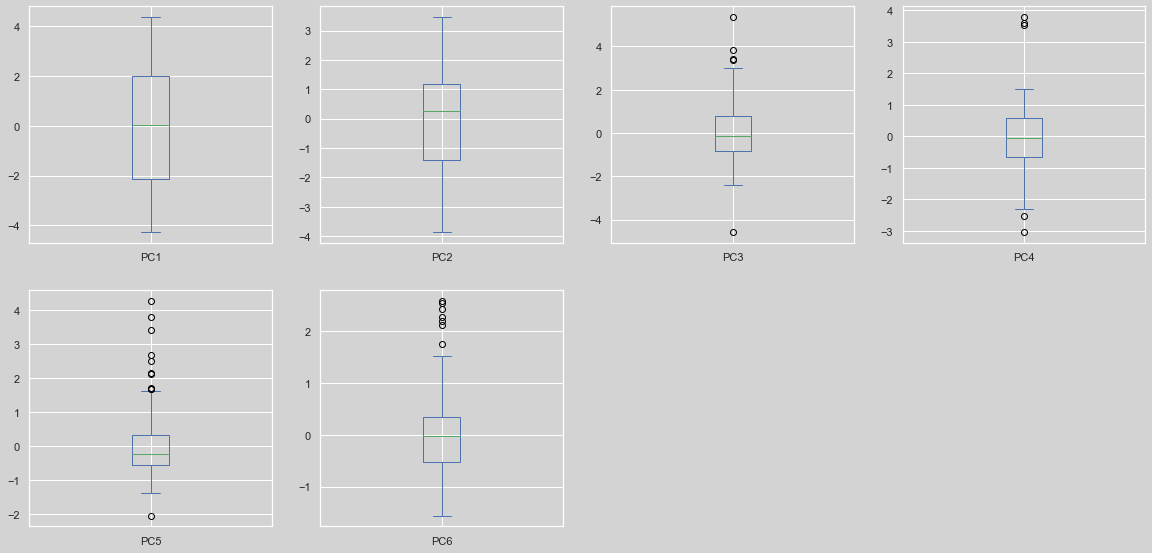

In [24]:
wine_final.plot(kind="box",subplots=True,layout=(4,4),figsize=(20,20))
plt.show()

In [25]:
# Outlier Handling for PC3

Q1 = np.percentile(wine_final["PC3"],25,interpolation = 'midpoint')
Q3 = np.percentile(wine_final["PC3"],75,interpolation = 'midpoint')
IQR = Q3 - Q1
lower_limit = Q1 - (1.5*IQR)
upper_limit = Q3 + (1.5*IQR)
wine_final["PC3"]=np.where(wine_final["PC3"]>upper_limit,upper_limit,np.where(wine_final["PC3"]<lower_limit,lower_limit,wine_final["PC3"]))

# Outlier Handling for PC4

Q1 = np.percentile(wine_final["PC4"],25,interpolation = 'midpoint')
Q3 = np.percentile(wine_final["PC4"],75,interpolation = 'midpoint')
IQR = Q3 - Q1
lower_limit = Q1 - (1.5*IQR)
upper_limit = Q3 + (1.5*IQR)
wine_final["PC4"]=np.where(wine_final["PC4"]>upper_limit,upper_limit,np.where(wine_final["PC4"]<lower_limit,lower_limit,wine_final["PC4"]))

# Outlier Handling for PC5

Q1 = np.percentile(wine_final["PC5"],25,interpolation = 'midpoint')
Q3 = np.percentile(wine_final["PC5"],75,interpolation = 'midpoint')
IQR = Q3 - Q1
lower_limit = Q1 - (1.5*IQR)
upper_limit = Q3 + (1.5*IQR)
wine_final["PC5"]=np.where(wine_final["PC5"]>upper_limit,upper_limit,np.where(wine_final["PC5"]<lower_limit,lower_limit,wine_final["PC5"]))

# Outlier Handling for PC6

Q1 = np.percentile(wine_final["PC6"],25,interpolation = 'midpoint')
Q3 = np.percentile(wine_final["PC6"],75,interpolation = 'midpoint')
IQR = Q3 - Q1
lower_limit = Q1 - (1.5*IQR)
upper_limit = Q3 + (1.5*IQR)
wine_final["PC6"]=np.where(wine_final["PC6"]>upper_limit,upper_limit,np.where(wine_final["PC6"]<lower_limit,lower_limit,wine_final["PC6"]))

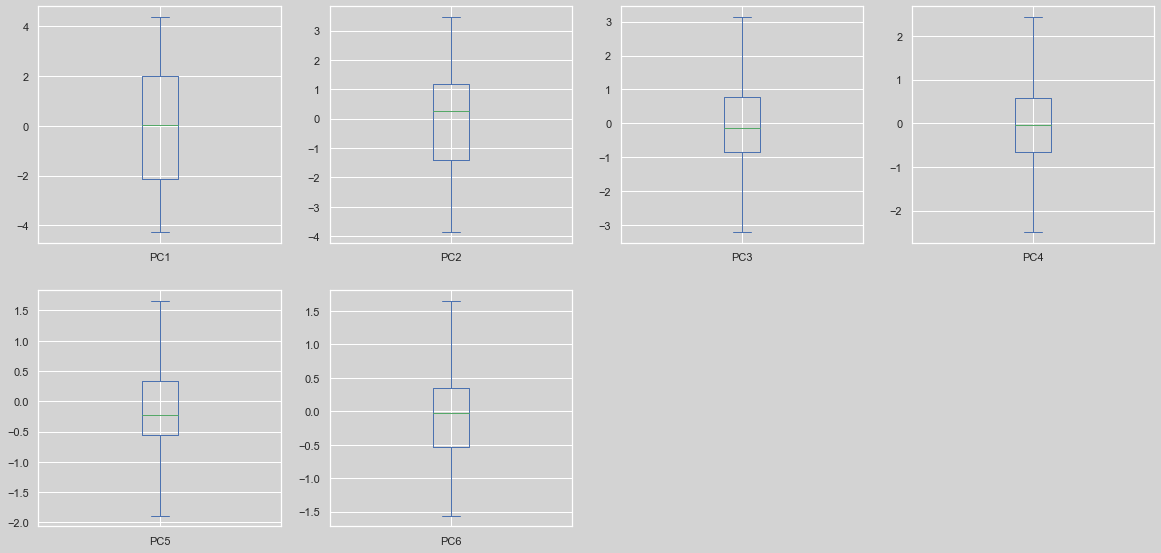

In [26]:
wine_final.plot(kind="box",subplots=True,layout=(4,4),figsize=(20,20))
plt.show()

Outliers were not found in PC1 and PC2 , but others were handled and from above graph , we can see that there are no outliers 

Hopkins Statistics Test - A way of measuring the cluster tendency of a data set.

In [27]:
from pyclustertend import hopkins
hopkins(wine_final,178)

0.35311449560777664

In [28]:
#Since the value is around 0.5 the given dataset has some randomness

1. Kmeans clustering algorithm

Sihoutte score check

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows wi

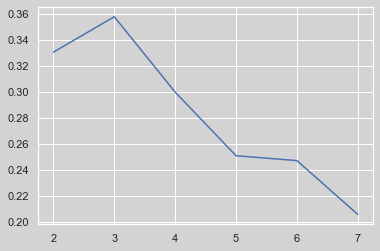

In [29]:
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 8):
    kmeans = KMeans(n_clusters=k).fit(wine_final)
    sse_.append([k, silhouette_score(wine_final, kmeans.labels_)])
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows wi

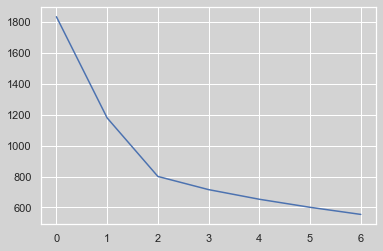

In [30]:
ssd = []
for num_clusters in list(range(1,8)):
    model_cluster = KMeans(n_clusters = num_clusters, max_iter=100)
    model_cluster.fit(wine_final)
    ssd.append(model_cluster.inertia_)

plt.plot(ssd)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows wi

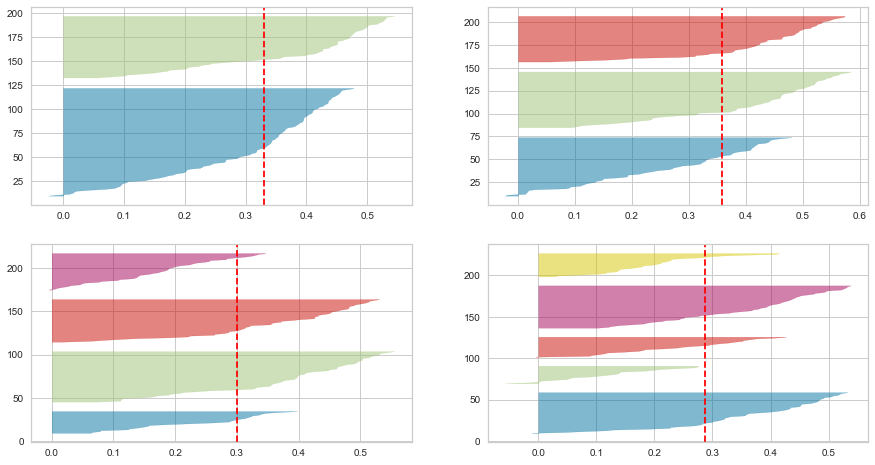

In [31]:
from yellowbrick.cluster import SilhouetteVisualizer


fig,ax = plt.subplots(2,2, figsize = (15,8))
for i in [2,3,4,5]:

    # create kmeans instance for different numbers of clusters
    km = KMeans(n_clusters=i, random_state=42)
    q, mod = divmod(i,2)

    #create visualiser
    visualizer = SilhouetteVisualizer(km, colors = 'yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(wine_final)

From silhoutte score , elbow point method and Silhoutter visualiser , we can see that clusters should be 3

As the silhoutte score is high for cluster 3 from the graph , and also the silhoutte visualiser shows cluster 3 to be equally distributed

Other visualisers show unequal distribution

So proceeding the cluster = 3

In [32]:
wine_clus= KMeans(n_clusters = 3, max_iter=50,random_state = 100)
wine_clus.fit(wine_final)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(max_iter=50, n_clusters=3, random_state=100)

In [33]:
wine_clus.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [34]:
wine_final["cluster id"]=wine_clus.labels_
wine_final.head().style.background_gradient(cmap="BuPu")

,PC1,PC2,PC3,PC4,PC5,PC6,cluster id
0,3.329763,1.403881,-0.168232,-0.043424,0.760087,0.121159,0
1,2.187731,-0.349782,-2.037662,-0.269176,-0.104057,-0.847644,0
2,2.549298,0.964828,0.990651,0.616498,-0.481764,0.743088,0
3,3.816423,2.670785,-0.194308,0.511016,-0.338059,-0.194495,0
4,1.008417,0.890312,2.014713,-0.316643,0.386236,-0.116065,0


In [35]:
wine_final['cluster id'].value_counts()

1    65
0    62
2    51
Name: cluster id, dtype: int64

We can see that the clusters are uniformly distributed

Text(0.5, 1.0, 'plot of PC1 and PC2 based on cluster id')

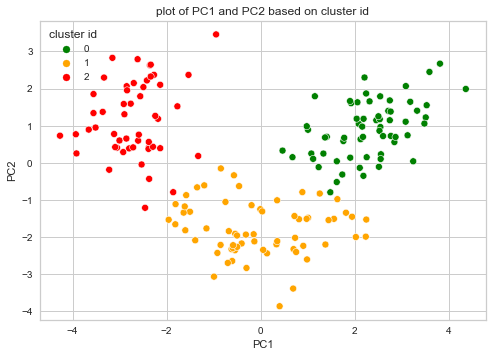

In [37]:
# scatter plot for PC1, PC2 and clusterId
sns.scatterplot(x='PC1',y='PC2',hue='cluster id',legend='full',data=wine_final, palette=['green','orange','red'])
plt.title("plot of PC1 and PC2 based on cluster id")

Text(0.5, 1.0, 'plot of PC3 and PC4 based on cluster id')

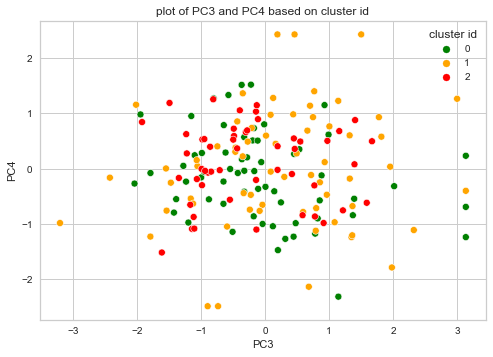

In [38]:
# scatter plot for PC3, PC4 and clusterId
sns.scatterplot(x='PC3',y='PC4',hue='cluster id',legend='full',data=wine_final, palette=['green','orange','red'])
plt.title("plot of PC3 and PC4 based on cluster id")

Text(0.5, 1.0, 'plot of PC5 and PC6 based on cluster id')

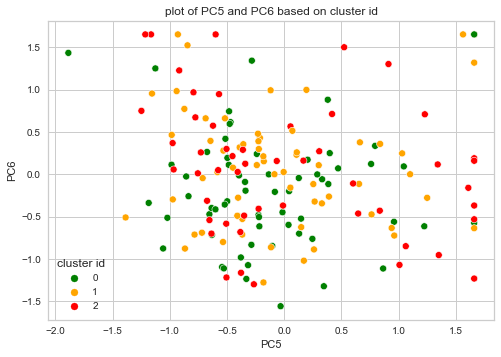

In [39]:
# scatter plot for PC5, PC6 and clusterId
sns.scatterplot(x='PC5',y='PC6',hue='cluster id',legend='full',data=wine_final, palette=['green','orange','red'])
plt.title("plot of PC5 and PC6 based on cluster id")

In [40]:
wine_merge=pd.merge(wine,wine_final,left_index=True,right_index=True )
wine_merge.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,PC1,PC2,PC3,PC4,PC5,PC6,cluster id
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,3.329763,1.403881,-0.168232,-0.043424,0.760087,0.121159,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2.187731,-0.349782,-2.037662,-0.269176,-0.104057,-0.847644,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2.549298,0.964828,0.990651,0.616498,-0.481764,0.743088,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,3.816423,2.670785,-0.194308,0.511016,-0.338059,-0.194495,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1.008417,0.890312,2.014713,-0.316643,0.386236,-0.116065,0


In [41]:
wine_analyse=wine_merge.drop(["PC1","PC2","PC3","PC4","PC5","PC6"],axis=1)
wine_analyse.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,cluster id
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0


Visualisation of all the features based on the cluster

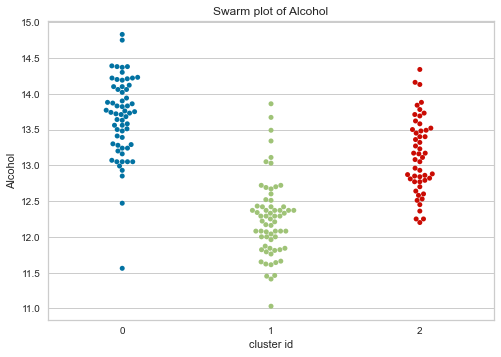

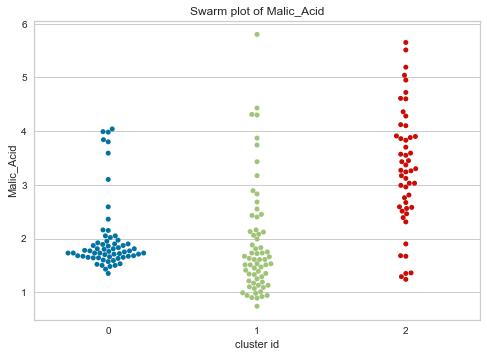

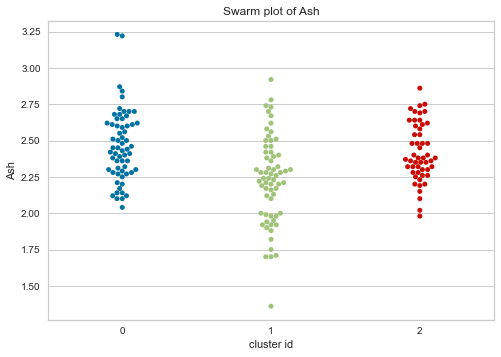

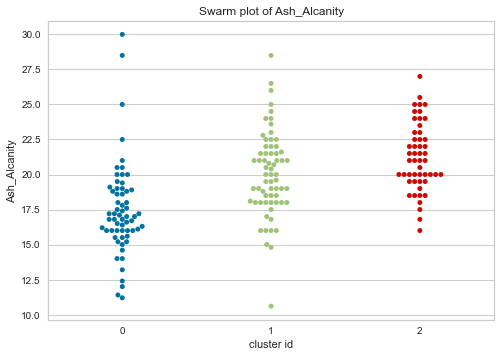

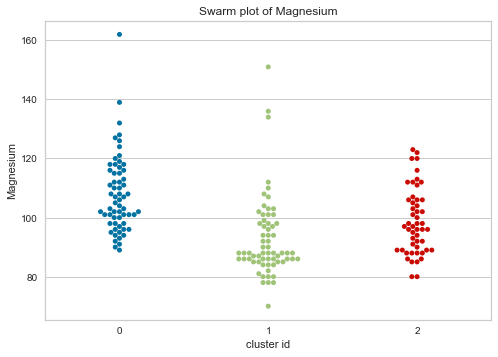

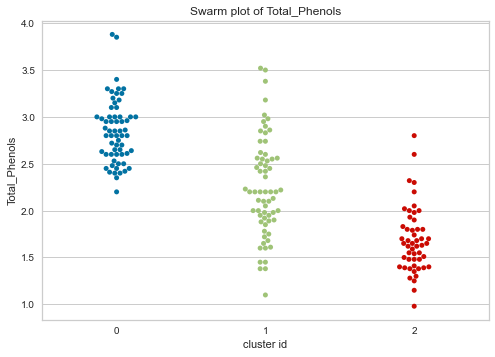

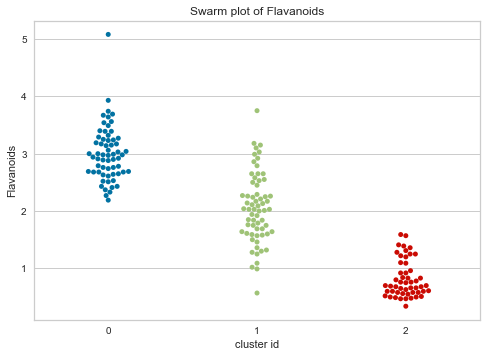

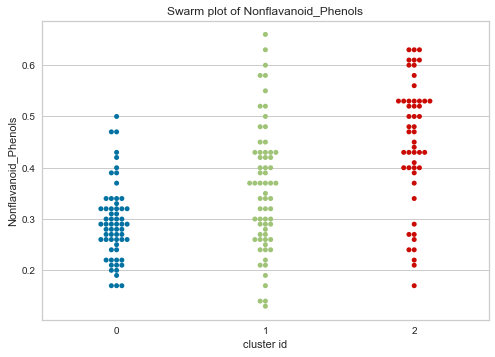

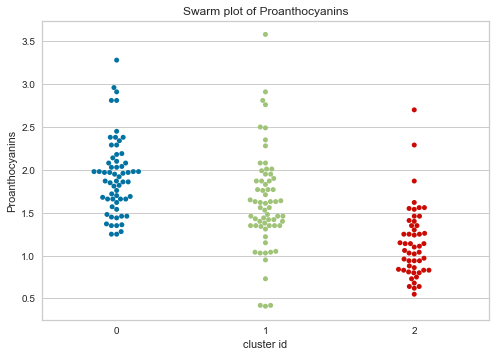

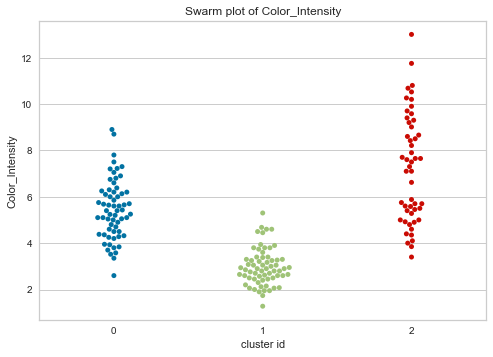

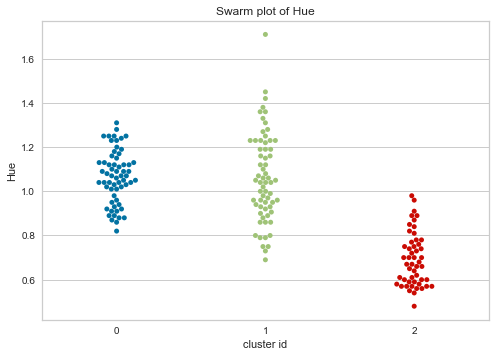

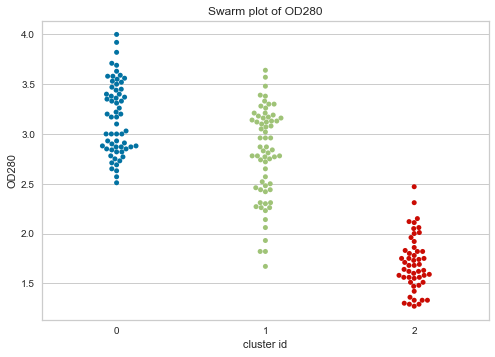

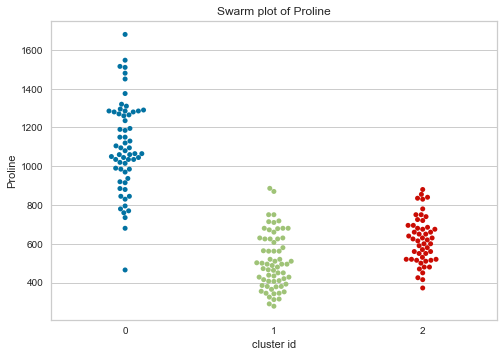

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 62.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 64.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 54.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


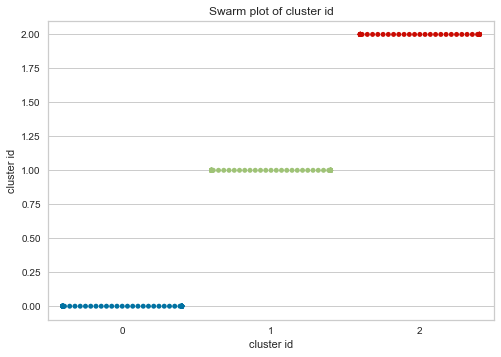

In [42]:
for columns in wine_analyse.columns:
    plt.subplot()
    sns.swarmplot(x=wine_analyse['cluster id'], y=wine_analyse[columns])
    plt.title('Swarm plot of {}'.format(columns))
    plt.show()

2. Hierarchical clustering algorithm

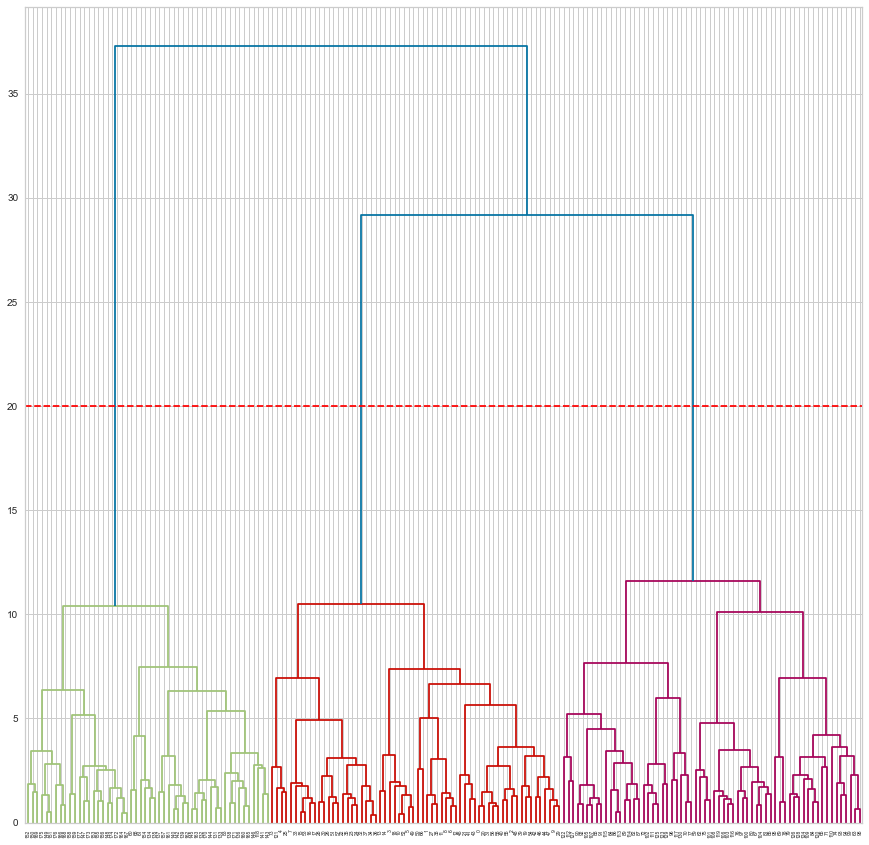

In [43]:
wine_HC = wine_final
plt.figure(figsize = (15,15))
HC_cluster = linkage(wine_HC, method = "ward", metric='euclidean')
dendrogram(HC_cluster)
plt.hlines(20,0,5000,colors='red',linestyles='dashed')
plt.show()

From the dendogram we can see that the largest line is right most and it is cut with a horizontal line giving 3 cluster points

In [44]:
clusterCut = pd.Series(cut_tree(HC_cluster, n_clusters = 3).reshape(-1,))
ClusterID=clusterCut.to_frame("cluster_id")
ClusterID.head()

,cluster_id
0,0
1,0
2,0
3,0
4,0


In [45]:
HC_wine = pd.concat([wine, ClusterID], axis=1)
HC_wine.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,cluster_id
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0


In [46]:
HC_wine['cluster_id'].value_counts()

1    64
0    62
2    52
Name: cluster_id, dtype: int64

In [47]:
#Here also we are getting almost the same results like K means with almost equal distribution

Visualisation of all the features based on the cluster

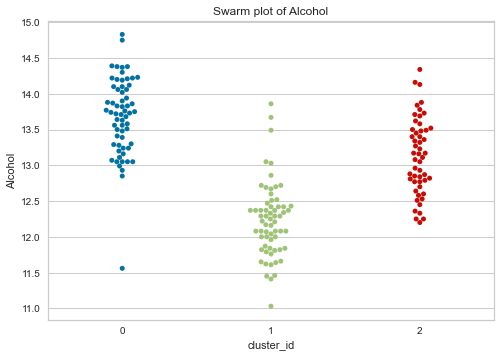

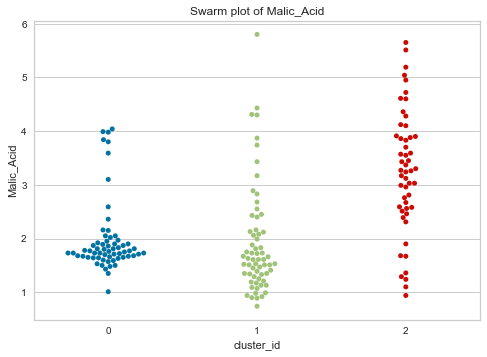

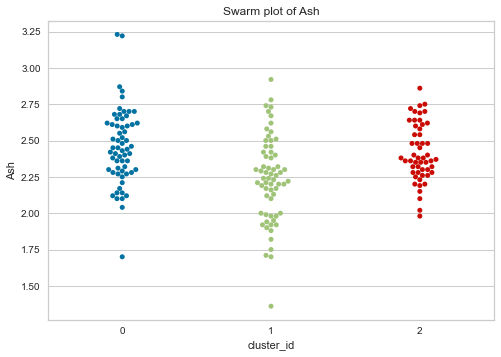

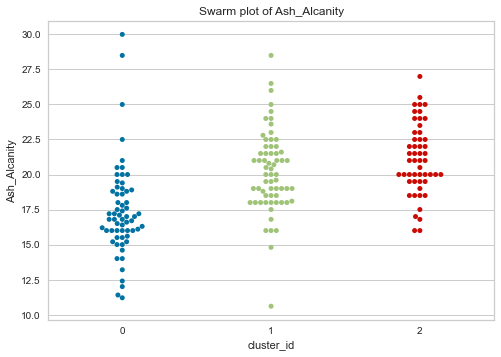

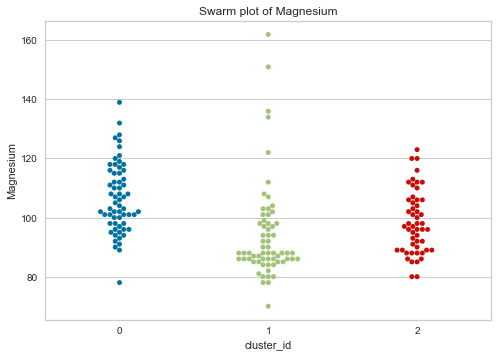

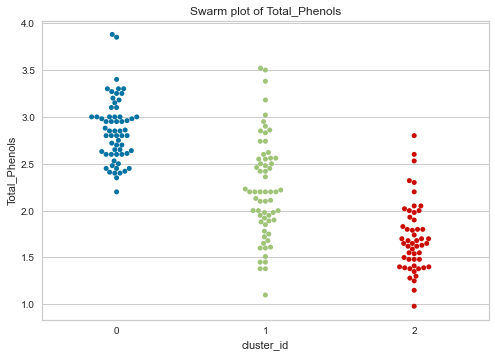

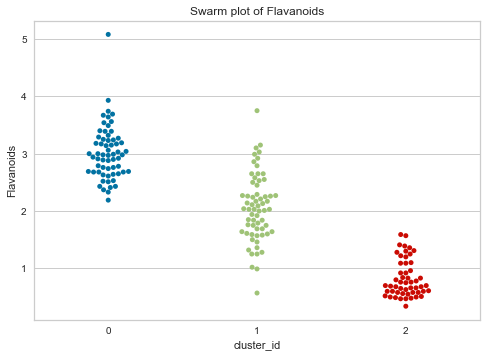

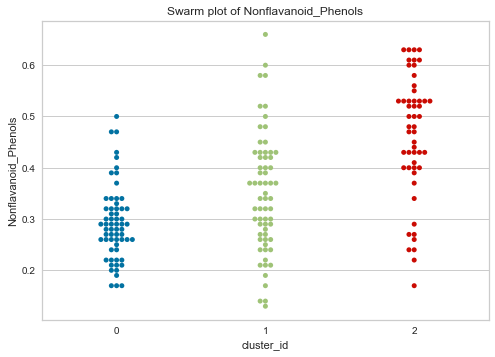

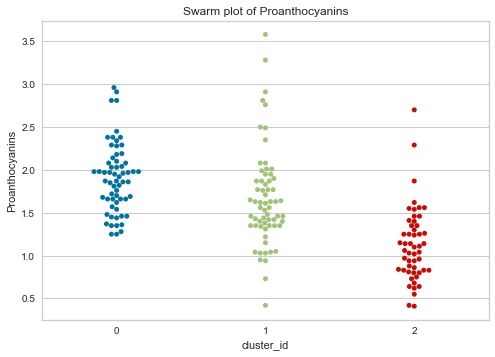

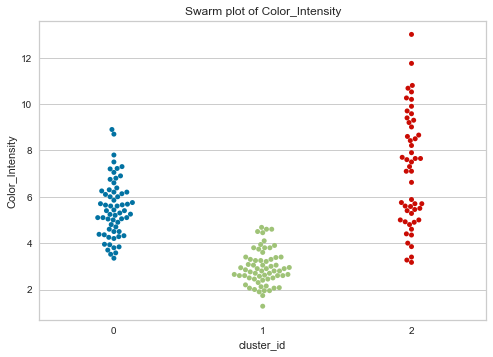

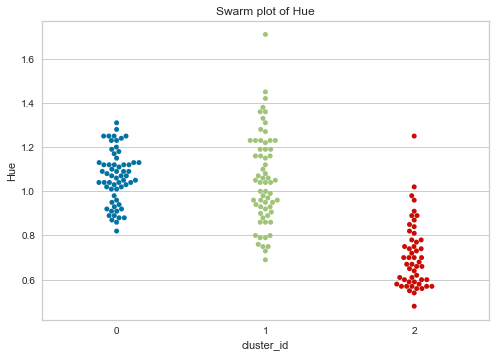

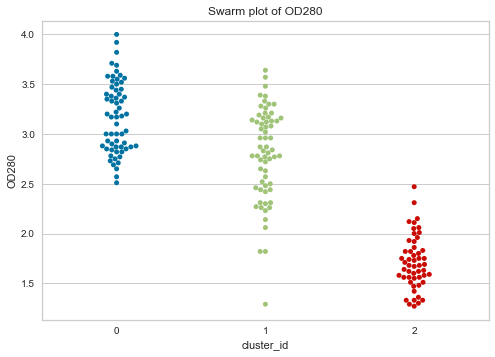

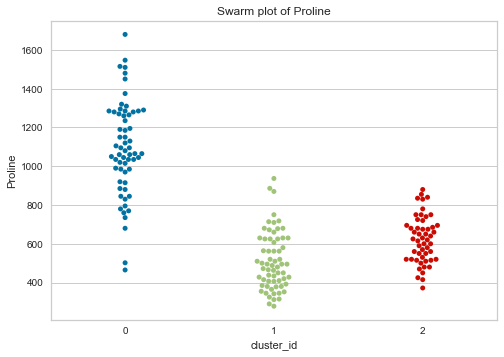

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 62.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 64.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 55.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


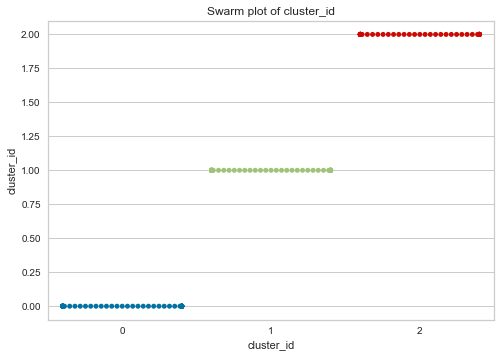

In [48]:
for columns in HC_wine.columns:
    plt.subplot()
    sns.swarmplot(x=HC_wine['cluster_id'], y=HC_wine[columns])
    plt.title('Swarm plot of {}'.format(columns))
    plt.show()

In [49]:
wine_finalhc=wine_final
wine_finalhc["cluster id"]=HC_wine['cluster_id']
wine_finalhc.head()

,PC1,PC2,PC3,PC4,PC5,PC6,cluster id
0,3.329763,1.403881,-0.168232,-0.043424,0.760087,0.121159,0
1,2.187731,-0.349782,-2.037662,-0.269176,-0.104057,-0.847644,0
2,2.549298,0.964828,0.990651,0.616498,-0.481764,0.743088,0
3,3.816423,2.670785,-0.194308,0.511016,-0.338059,-0.194495,0
4,1.008417,0.890312,2.014713,-0.316643,0.386236,-0.116065,0


Text(0.5, 1.0, 'plot of PC1 and PC2 based on cluster id')

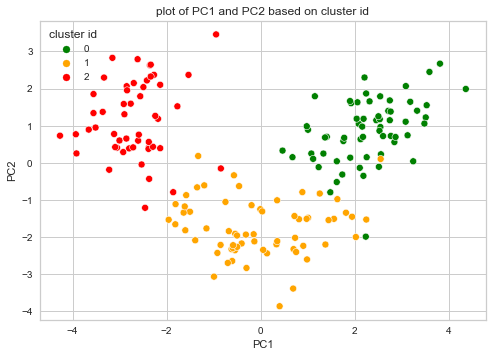

In [50]:
# scatter plot for PC1, PC2 and clusterId
sns.scatterplot(x='PC1',y='PC2',hue='cluster id',legend='full',data=wine_finalhc, palette=['green','orange','red'])
plt.title("plot of PC1 and PC2 based on cluster id")

Text(0.5, 1.0, 'plot of PC3 and PC4 based on cluster id')

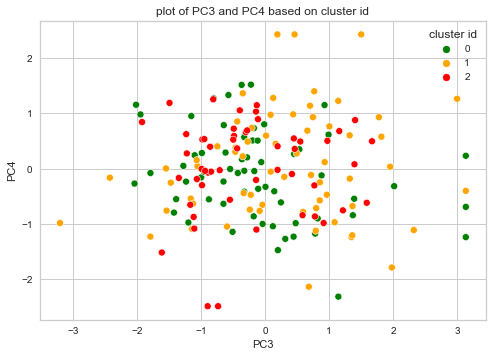

In [51]:
# scatter plot for PC3, PC4 and clusterId
sns.scatterplot(x='PC3',y='PC4',hue='cluster id',legend='full',data=wine_finalhc, palette=['green','orange','red'])
plt.title("plot of PC3 and PC4 based on cluster id")

Text(0.5, 1.0, 'plot of PC5 and PC6 based on cluster id')

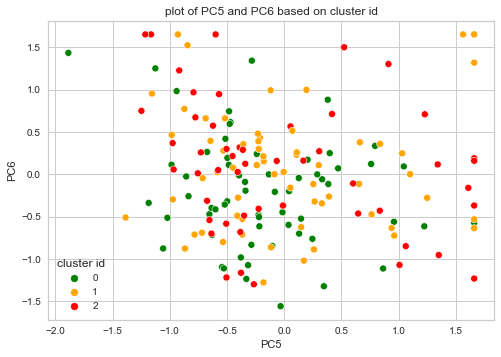

In [52]:
# scatter plot for PC5, PC6 and clusterId
sns.scatterplot(x='PC5',y='PC6',hue='cluster id',legend='full',data=wine_finalhc, palette=['green','orange','red'])
plt.title("plot of PC5 and PC6 based on cluster id")

In [53]:
Kmeans=wine_analyse['cluster id'].value_counts().to_frame()
Agg = HC_wine['cluster_id'].value_counts().to_frame()
Result=pd.concat([Kmeans,Agg],axis=1)
Result.rename(columns = {'cluster id':'Kmeans cluster distribution','cluster_id':'HC cluster distribution'}, inplace = True)
Result

,Kmeans cluster distribution,HC cluster distribution
1,65,64
0,62,62
2,51,52


Here we can see that the cluster distribution is matching almost the same in both cases with just a data point being shuffled in both the cases

Even when the cluster vs PCA were plotted the cluster distribution is almost the same from both the method graphs

So for this dataset , we can consider both as the results are almost matching 